# Machine learning

## Régression linéaire

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

Récupérer les données advertising

In [5]:
frame_pub=pd.read_csv("../data/Advertising.csv",index_col=0)

In [7]:
frame_pub.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9



créer un modèle linéaire

In [8]:
modele_ols_stat=ols("Sales~TV+Radio+Newspaper",data=frame_pub).fit()

In [9]:
modele_ols_stat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 10 Apr 2018   Prob (F-statistic):           1.58e-96
Time:                        15:10:04   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Avec scikit-learn

In [10]:
#on crée un modele
modele_ols_skl=LinearRegression()

In [13]:
#on ajuste les paramètres du modèles aux données
modele_ols_skl.fit(frame_pub.drop("Sales",axis=1),frame_pub["Sales"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
modele_ols_skl.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [15]:
modele_ols_skl.intercept_

2.9388893694594085

## Kmeans

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

### Traitement d'image avec python

In [65]:
from imageio import imread

In [66]:
ny=imread("../data/New York.jpg")

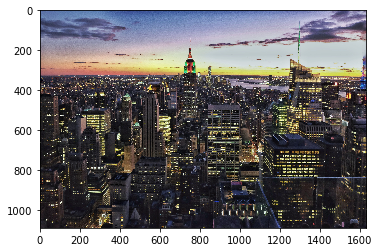

In [71]:
plt.imshow(image)

In [69]:
ny.shape

(3264, 4896, 3)

On peut réduire la taille de l'image (on conserve un pixel sur 3)

In [70]:
image=ny[::3,::3]

on transforme les données en un tableau à deux dimensions avec des valeurs entre 0 et 1


In [73]:
face=(image/255.0).reshape(-1,3)

In [74]:
face.shape

(1775616, 3)

on va réduire le nombre de couleurs à 3


In [75]:
n_couleurs=3

In [76]:
from sklearn.cluster import KMeans

In [77]:
modele_km =KMeans(n_clusters=n_couleurs)

In [78]:
modele_km.fit(face)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [79]:
centres=modele_km.cluster_centers_
classes=modele_km.labels_

In [80]:
centres

array([[ 0.14374756,  0.13251457,  0.14618121],
       [ 0.75425479,  0.74317679,  0.70790746],
       [ 0.43746735,  0.41198715,  0.45399358]])

In [81]:
classes

array([2, 2, 2, ..., 0, 0, 0])

In [84]:
face2=centres[classes]

In [85]:
new_image=(face2*255.0).reshape(image.shape).astype("uint8")

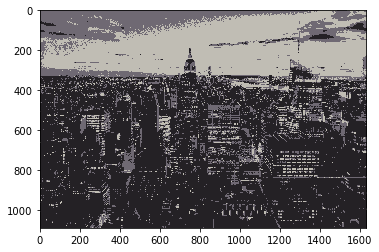

In [86]:
plt.imshow(new_image)

## L'analyse du churn

On veut analyser le churn sur des données de telecom

In [16]:
telecom=pd.read_csv("../data/telecom.csv")

In [18]:
telecom.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [22]:
telecom.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?'],
      dtype='object')

In [26]:
#créer y 0/1 en fonction de Churn?
telecom["Churn"]=np.where(telecom["Churn?"]=="True." ,1,0)

In [23]:
x=telecom[['VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls']]

On sépare les données en apprentissage  / test

In [25]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train, y_test = train_test_split(telecom[['VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls']],telecom["Churn"],test_size=0.3 )

In [28]:
x_train.shape

(2333, 14)

In [29]:
y_train.shape

(2333,)

On va appliquer 6 modèles différents

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [31]:
modele_logit=LogisticRegression()
modele_svm=SVC()
modele_knn=KNeighborsClassifier()
modele_rf=RandomForestClassifier()
modele_gbm=GradientBoostingClassifier()

In [34]:
modele_logit.fit(x_train,y_train)
modele_svm.fit(x_train,y_train)
modele_knn.fit(x_train,y_train)
modele_rf.fit(x_train,y_train)
modele_gbm.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [36]:
pd.Series(modele_rf.feature_importances_,index=['VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls'])

VMail Message     0.051378
Day Mins          0.165843
Day Calls         0.045019
Day Charge        0.121941
Eve Mins          0.071061
Eve Calls         0.035689
Eve Charge        0.081512
Night Mins        0.065025
Night Calls       0.049078
Night Charge      0.059680
Intl Mins         0.049805
Intl Calls        0.034932
Intl Charge       0.042351
CustServ Calls    0.126686
dtype: float64

On évalue la qualité de ces modèles

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score,roc_auc_score

In [43]:
print(accuracy_score(y_test,modele_logit.predict(x_test)))
print(accuracy_score(y_test,modele_svm.predict(x_test)))
print(accuracy_score(y_test,modele_knn.predict(x_test)))
print(accuracy_score(y_test,modele_rf.predict(x_test)))
print(accuracy_score(y_test,modele_gbm.predict(x_test)))

0.856
0.857
0.881
0.917
0.91


In [44]:
print(roc_auc_score(y_test,modele_logit.predict(x_test)))
print(roc_auc_score(y_test,modele_svm.predict(x_test)))
print(roc_auc_score(y_test,modele_knn.predict(x_test)))
print(roc_auc_score(y_test,modele_rf.predict(x_test)))
print(roc_auc_score(y_test,modele_gbm.predict(x_test)))

0.522721152826
0.5
0.636351396561
0.747660157812
0.746489216734


In [45]:
confusion_matrix(y_test,modele_svm.predict(x_test))

array([[857,   0],
       [143,   0]], dtype=int64)

### Recherche d'hyper-paramètres avec du Grid Search

In [46]:
from sklearn.model_selection import GridSearchCV

In [56]:
dico_param={"n_estimators":[10,100,1000], "max_depth":[3,5,8,12] }

In [57]:
modele_grid=GridSearchCV(modele_rf,param_grid=dico_param , scoring="roc_auc",cv=4)

In [58]:
modele_grid.fit(x_train,y_train)

GridSearchCV(cv=4, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 100, 1000], 'max_depth': [3, 5, 8, 12]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [59]:
modele_grid.best_params_

{'max_depth': 8, 'n_estimators': 1000}

In [60]:
modele_grid.grid_scores_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.85144, std: 0.03452, params: {'max_depth': 3, 'n_estimators': 10},
 mean: 0.84626, std: 0.02679, params: {'max_depth': 3, 'n_estimators': 100},
 mean: 0.85337, std: 0.02163, params: {'max_depth': 3, 'n_estimators': 1000},
 mean: 0.85438, std: 0.03415, params: {'max_depth': 5, 'n_estimators': 10},
 mean: 0.86317, std: 0.02420, params: {'max_depth': 5, 'n_estimators': 100},
 mean: 0.86669, std: 0.02287, params: {'max_depth': 5, 'n_estimators': 1000},
 mean: 0.85415, std: 0.02192, params: {'max_depth': 8, 'n_estimators': 10},
 mean: 0.87009, std: 0.02466, params: {'max_depth': 8, 'n_estimators': 100},
 mean: 0.87187, std: 0.02385, params: {'max_depth': 8, 'n_estimators': 1000},
 mean: 0.83735, std: 0.03632, params: {'max_depth': 12, 'n_estimators': 10},
 mean: 0.86754, std: 0.02060, params: {'max_depth': 12, 'n_estimators': 100},
 mean: 0.86957, std: 0.02723, params: {'max_depth': 12, 'n_estimators': 1000}]

In [61]:
print(roc_auc_score(y_test,modele_grid.predict(x_test)))

0.734261654332
